# 077003-BRT-GLV Calcoli

In [109]:
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [10,5] # width, height in inches. Defaults = [6.4, 4.8].
#plt.rcParams["figure.dpi"] = 100 #defaults = 100.

## Dati di calcolo

In [110]:
D1 = 0.480 # diametro interno cesto
D2 = 1.580 # diametro esterno cesto
L  = 1.600 # altezza cesto (cotone)
Q = np.linspace(250, 1000, 11) # [m3/h] portata pompa
Q0 = Q/3600 # [m3/s] portata pompa

rho = 1000 # [kg/m3] densità acqua
A0 = np.pi * (D1/2)**2 # area condotto centrale cesto

## Pressione dinamica sul cesto
Considero che tutta la velocità del flusso si trasformi in pressione statica:
$$F_{dinamica} = \rho A_0 v_0^2 \; [N] $$

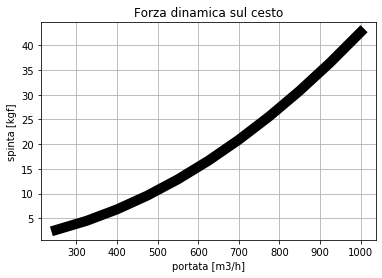

In [111]:
F_dinamica = rho*A0*v0**2

# PLOTS
plt.plot(Q, F_dinamica/10, 'k', lw=10)
plt.xlabel('portata [m3/h]'), plt.ylabel('spinta [kgf]'), plt.title('Forza dinamica sul cesto')
plt.grid()
plt.show()

La spinta dinamica massima si attesta sui 50kgf, non è significativa.

## Pressione statica sul cesto

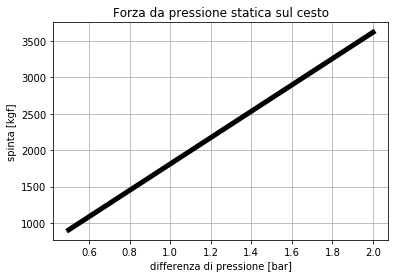

In [112]:
## Pressione statica sul cesto
P = np.linspace(0.5,2,10)*100000 # [Pa] diiferenza di pressione [1 bar = 100'000 Pa]
Fv_statica = P * A0

# PLOTS
plt.plot(P/100000, Fv_statica/10, 'k', lw=5)
plt.xlabel('differenza di pressione [bar]'), plt.ylabel('spinta [kgf]'), plt.title('Forza da pressione statica sul cesto')
plt.grid()
plt.show()

La pressione statica può invece sollevare il cesto.  
Cesto + cotone = 1300 + 900 = 2200kg

## Velocità del flusso nel condotto

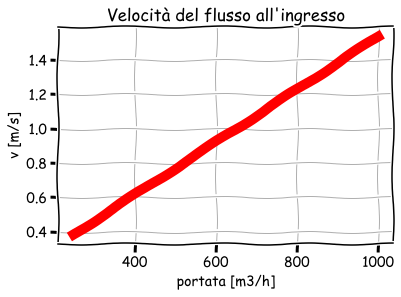

Velocità massima (Q = 1000 m3/h) all'imbocco del cesto = 1.5 m/s


In [113]:
v0 = Q0 / A0 # velocità all'ingresso del condotto

# PLOTS
with plt.xkcd():
    plt.plot(Q, v0, 'r', lw=10)
    plt.xlabel('portata [m3/h]'), plt.ylabel('v [m/s]'), plt.title("Velocità del flusso all'ingresso")
    plt.grid(lw=1.0)
    plt.show()
print(f"Velocità massima (Q = {Q[-1]:.0f} m3/h) all'imbocco del cesto = {v0[-1]:.1f} m/s")


## Velocità media del flusso attraverso il cotone
* Considero il cotone una materiale isotropo ed omogeneo, calcolo la velocità media date le aree di attraversamento
* Non tengo conto dell'area dalla *croce* contrale

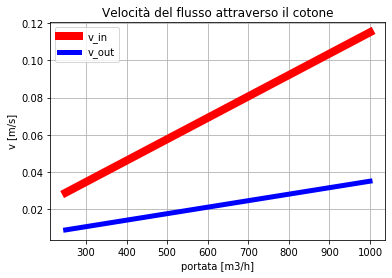

In [114]:
A1 = D1 * np.pi * L # area interna del cilindro di cotone (cesto)
v1 = Q0 / A1 # velocità radiale sul cilindro interno
A2 = D2 * np.pi * L # area esterna del cilindro di cotone (cesto)
v2 = Q0 / A2 # velocità radiale sul cilindro esterno

# PLOTS
plt.plot(Q, v1, 'r', label='v_in', lw=8)
plt.plot(Q, v2, 'b', label='v_out', lw=5)
plt.xlabel('portata [m3/h]'), plt.ylabel('v [m/s]'), plt.title('Velocità del flusso attraverso il cotone')
plt.legend(), plt.grid()
plt.show()

## Velocità nel condotto: tubo vuoto ideale
Ipotizzo che la portata attraverso il cotone sia costante in ogni sezione (lungo l'altezza).  
* tubo interno = serbatoio *infinito* 
* pressione costante nel condotto

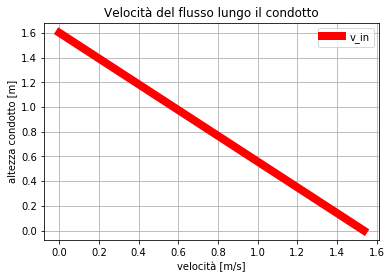

In [115]:
steps = 10
Li = np.linspace(0,L,steps) # posizione delle sezioni lungo il tubo
Qi = Q0[-1] * np.linspace(1,0,steps)# portata lungo il condotto
vi = Qi / A0

# PLOTS
plt.plot(vi, Li, 'r', label='v_in', lw=8)
plt.xlabel('velocità [m/s]'), plt.ylabel('altezza condotto [m]'), plt.title('Velocità del flusso lungo il condotto')
plt.legend(), plt.grid()
plt.show()

## Velocità nel condotto: imposta costante
Con le ipotesi:
* considero condotto libero (senza *croce* e *piani*)
* impongo che tutta la portata passi attraverso il cotone

Velocità e portata diminuiscono linearmente lungo il condotto.  
La sezione che mi darebbe velocià costante diminuisce parimenti in modo lineare.  
Il diametro del condotto a velocità costante è quindi:
$$D_{eq} = 2 \sqrt{ \frac{A(L)}{\pi}} $$
Se il condotto non ha forma circolare si dovrebbe utilizzare il diamtero idraulico equivalente.

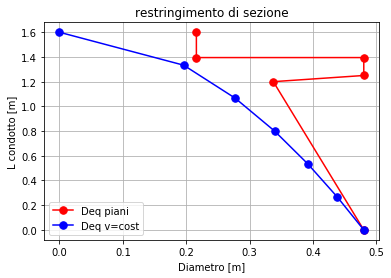

In [116]:
# aree attuali
Lc = np.array([ 0,            1200, 1250, 1395,               1395,               1600])/1000
Ac = np.array([A0, A0-0.5*0.428**2,   A0,   A0, np.pi*(0.216/2)**2, np.pi*(0.216/2)**2])
Dc = 2*np.sqrt(Ac/np.pi)

# velocità costante imposta
n_dia = 5 # numero di sezioni considerate (diaframmi)
L_dia = np.linspace(0,L,n_dia+2) # posizione delle sezioni lungo il tubo
A_l = A0 * np.linspace(1,0,n_dia+2) # area equivalente delle sezioni per V=cost
Deq = 2*np.sqrt(A_l/np.pi)

# PLOTS
#plt.plot(Lc, Dc, 'r.-', ms=15, label='Deq piani')
#plt.plot(L_dia, Deq, 'b.-', ms=15, label='Deq v=cost')
#plt.xlabel('L condotto [m]'), plt.ylabel('Diametro [m]'), plt.title('restringimento di sezione')
#plt.legend(), plt.grid()
#plt.show()

# PLOTS
plt.plot(Dc, Lc, 'r.-', ms=15, label='Deq piani')
plt.plot(Deq, L_dia, 'b.-', ms=15, label='Deq v=cost')
plt.ylabel('L condotto [m]'), plt.xlabel('Diametro [m]'), plt.title('restringimento di sezione')
plt.legend(), plt.grid()
plt.show()

In [117]:
a = np.array([L_dia, Deq])*1000
print("Tabella lunghezze-diametri:")
print(np.array_str(a.T, precision=0, suppress_small=True))

Tabella lunghezze-diametri:
[[   0.  480.]
 [ 267.  438.]
 [ 533.  392.]
 [ 800.  339.]
 [1067.  277.]
 [1333.  196.]
 [1600.    0.]]
